# Exploratory analysis: Mouse strain genotypes

We will mainly explore some of the data generated by the mouse experiments discussed in the intro lecture, and in more detail in the publications listed below. This will include downloading and importing data, describing the distributions of numerical value columns, and plotting several relationships. The main goal is to familiarize ourselves with the data while getting further practice with `pandas`.

If you ahead of schedule at any point, feel free to play with the data and explore it from different angles.

The full publication that inspired some of the data analyses steps we'll do in this practical course was published in Science in 2016:

__Systems proteomics of liver mitochondria function__      
by Evan G. Williams, Yibo Wu, Pooja Jha, Sébastien Dubuis et al.     
_Science_     
Volume 352(6291):[aad0189](http://science.sciencemag.org/content/352/6291/aad0189)    
June 10, 2016, [doi:10.1126/science.aad0189](doi:10.1126/science.aad0189)

The __supplemental files__ are listed here: http://science.sciencemag.org/content/suppl/2016/06/10/352.6291.aad0189.DC1

We further include some methodology discussed in a related paper about mouse-human PheWAS (Phenome wide association studies)

__Joint mouse–human phenome-wide association to test gene function and disease risk__ <br>
by Xusheng Wang, Ashutosh K. Pandey, Megan K. Mulligan, Evan G. Williams et al.     
_Nature Communications_     
Volume 7, Article number: 10464, [doi:10.1038/ncomms10464](doi:10.1038/ncomms10464)     

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# change some defaults for better images
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.mpl.rc("figure", figsize=(20,15))

## Download data

### Download Genotype supplement and check if it worked

Create a subdirectory in which you will store all your in- and output files. You can do this with the operating system's file manager, the browser, or even Python.

The genotype data is in the supplemental file "aad0189_DataFileS4.txt" or "Data S4". Open the file to check whether it was downloaded correctly and familiarize yourself with the data format.

### Repeat for Phenotype supplement

The phenotype data is in the supplemental file "aad0189_DataFileS2.xlsx" or "Data S2". Check it out in a spreadsheet editor, and then put it aside for now. We will return to it later.

In [3]:
phenotypes = pd.read_excel('../example_data/aad0189_DataFileS2.xlsx', sheet_name=None, index_col=0, na_values = 'x')

# Genotype overview
The mouse genotype data is provided as a tab-delimited text file.
### Load genotype file into a pandas DataFrame `genotype` using the correct read function

The supplementary file aad0189_DataFileS4.txt corresponds to BXD_3000.geno and BXD.geno on [genenetwork.org](http://www.genenetwork.org/webqtl/main.py?FormID=sharinginfo&GN_AccessionId=600).

In [4]:
genotype = pd.read_csv('../example_data/aad0189_DataFileS4.txt', sep='\t', comment='@', index_col='Locus')

### Check if importing worked by displaying the first 10 rows of the dataframe

In [5]:
genotype.head(10)

,Chr,cM,Mb,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,BXD11,...,BXD90,BXD91,BXD93,BXD94,BXD95,BXD98,BXD99,BXD100,BXD101,BXD102
Locus,,,,,,,,,,,,,,,,,,,,,
rs6269442,1,0.000,3.482275,B,B,D,D,D,B,B,...,B,D,B,D,D,B,B,B,B,B
rs6365999,1,0.000,4.811062,B,B,D,D,D,B,B,...,B,D,B,D,D,B,B,B,B,U
rs6376963,1,0.895,5.008089,B,B,D,D,D,B,B,...,B,D,B,D,D,B,B,B,B,U
rs3677817,1,1.185,5.176058,B,B,D,D,D,B,B,...,B,D,B,D,D,B,B,B,B,U
rs8236463,1,2.081,5.579193,B,B,D,D,D,B,D,...,B,D,B,D,D,B,B,B,B,U
rs6333200,1,2.081,6.217921,B,B,D,D,D,B,D,...,B,D,B,D,D,B,B,B,B,U
rs6298633,1,2.367,6.820241,B,B,D,D,D,B,D,...,B,D,B,D,D,B,B,B,B,U
rs6241531,1,2.367,9.995925,B,B,D,D,D,B,D,...,B,D,B,D,D,B,B,B,B,D
rs6360236,1,3.263,11.073904,B,B,D,D,D,B,D,...,B,D,B,D,D,B,B,B,B,D


### Describe what the individuals rows and columns in the dataframe mean
You may have to have a look at the file header of the genotype file as well as the data repositories containing genetic data of mice: http://www.genenetwork.org/mouseCross.html and http://www.genenetwork.org/webqtl/main.py?FormID=sharinginfo&GN_AccessionId=600 

(use this type of markdown cell for text solutions)

### How many SNPs are defined in the genotype file?

In [6]:
genotype.shape

(3811, 96)

### How many different strains are included in the genotype file?

In [7]:
genotype.shape[1]

96

### Separate the genotype metadata from the genotype data

Create two DataFrames called `geno_meta` and `geno_bdh` by slicing the `genotype` DataFrame's columns accordingly. All the genotype identifiers and chromosomal positions should go in `geno_meta`, and the strain genotypes to `geno_bdh`.

In [8]:
geno_meta = genotype.iloc[:, :3]
geno_bdh = genotype.iloc[:, 3:]
geno_bdh

,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,BXD11,BXD12,BXD13,BXD14,...,BXD90,BXD91,BXD93,BXD94,BXD95,BXD98,BXD99,BXD100,BXD101,BXD102
Locus,,,,,,,,,,,,,,,,,,,,,
rs6269442,B,B,D,D,D,B,B,D,B,B,...,B,D,B,D,D,B,B,B,B,B
rs6365999,B,B,D,D,D,B,B,D,B,B,...,B,D,B,D,D,B,B,B,B,U
rs6376963,B,B,D,D,D,B,B,D,B,B,...,B,D,B,D,D,B,B,B,B,U
rs3677817,B,B,D,D,D,B,B,D,B,B,...,B,D,B,D,D,B,B,B,B,U
rs8236463,B,B,D,D,D,B,D,D,B,B,...,B,D,B,D,D,B,B,B,B,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEL-X_154259201,B,B,B,D,B,B,B,B,D,B,...,B,B,D,D,H,D,D,B,U,U
rs3657281,B,B,B,D,B,B,B,B,D,B,...,B,B,D,D,H,D,D,B,U,U
rs13484106,B,B,B,D,B,B,B,B,D,B,...,B,B,D,D,H,D,D,B,U,U


## Plot the distribution patterns of maternal and paternal alleles across strains and SNPs

### Plot the distributions of B and D alleles per mouse strain in a stacked bar chart

The bar chart should have as many bars as mouse strains. Each bar should reflect how many B, D, H and U alleles that particular mouse strain has. For this, you will first have to find a way to count the number of occurences of each label in each column of the `geno_bdh` DataFrame.


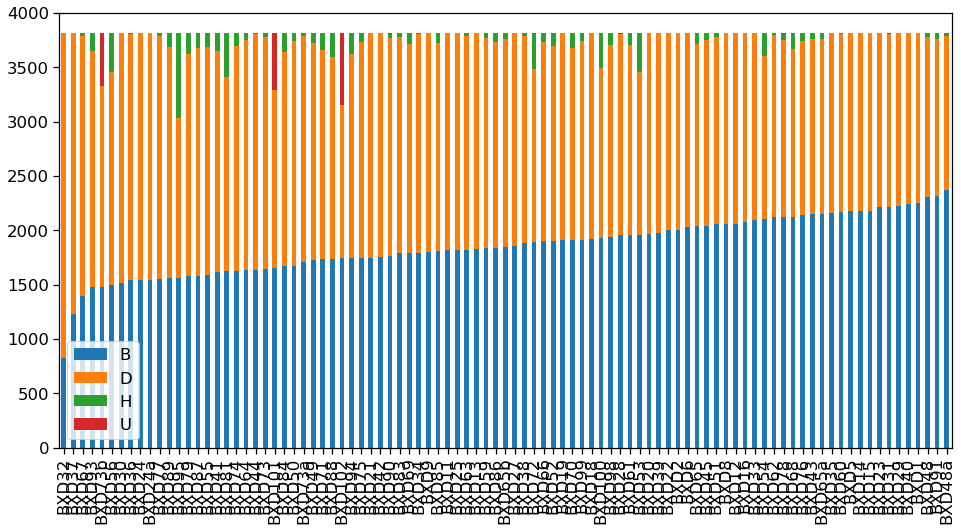

In [9]:
# fill na with 0
bdh_counts = geno_bdh.apply(pd.value_counts).fillna(0)

# plot stack histogram with sort B
bdh_counts.T.sort_values('B').plot(kind='bar', stacked = True, figsize=(16,8))

In [10]:
(geno_bdh == 'B').T.mean()

Locus
rs6269442          0.537634
rs6365999          0.526882
rs6376963          0.537634
rs3677817          0.548387
rs8236463          0.559140
                     ...   
CEL-X_154259201    0.569892
rs3657281          0.559140
rs13484106         0.559140
gnfX.146.867       0.559140
DXMit223           0.537634
Length: 3811, dtype: float64

### Plot the proportion of B alleles per SNP in a histogram

We know that the B/D alleles are evenly split in the offspring mice, but we don't know whether they are also evenly split across different SNPs. Just because the mice are ~50-50% B/H doesn't mean there aren't genomic positions where they are all `B` or all `H`. To investigate, create a histogram from the proportion of `B` alleles of each SNP.

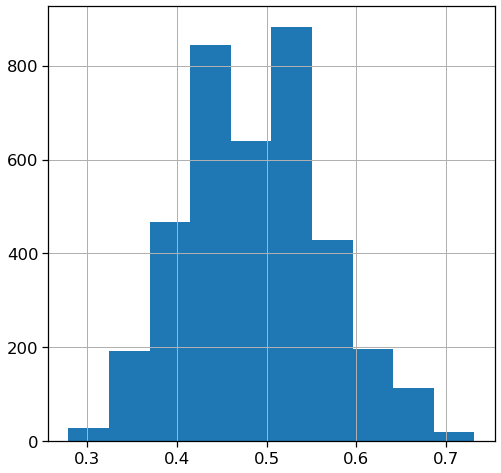

In [11]:
(geno_bdh == 'B').T.mean().hist(figsize=(8,8))

In [12]:
(geno_bdh == 'B').T.mean()

Locus
rs6269442          0.537634
rs6365999          0.526882
rs6376963          0.537634
rs3677817          0.548387
rs8236463          0.559140
                     ...   
CEL-X_154259201    0.569892
rs3657281          0.559140
rs13484106         0.559140
gnfX.146.867       0.559140
DXMit223           0.537634
Length: 3811, dtype: float64

### Plot the strain genotypes on a heatmap

We want to have a visual representation of how thoroughly the genomes of the original B and D strains have been mixed in their inbred offspring. A heatmap (a color-coded image of a matrix) would be suitable for this task. However, we have to help out the plotting libraries by converting letters into numbers so that they can be visualized with a color scale.

### Step 1: convert `geno_bdh`'s values to numbers and store it in a DataFrame named `geno`

There are four different kinds of genotypes: homozygous B, homozygous D, heterozygous (H) and unknown (U).

A logical conversion would be placing the heterozygous value between the homozygous values, hence:

|strain| value  |
|------|--------|
|  B   |  0     |
|  H   |  1     |
|  D   |  2     |
|  U   | missing (NaN)|

In [13]:
# replace geno type with number
geno = geno_bdh.replace(['B', 'H', 'D', 'U'], [0, 1, 2, np.nan])

### Step 2: Create a heatmap from the (now numeric) genotype DataFrame

Make sure that the plot is large enough.

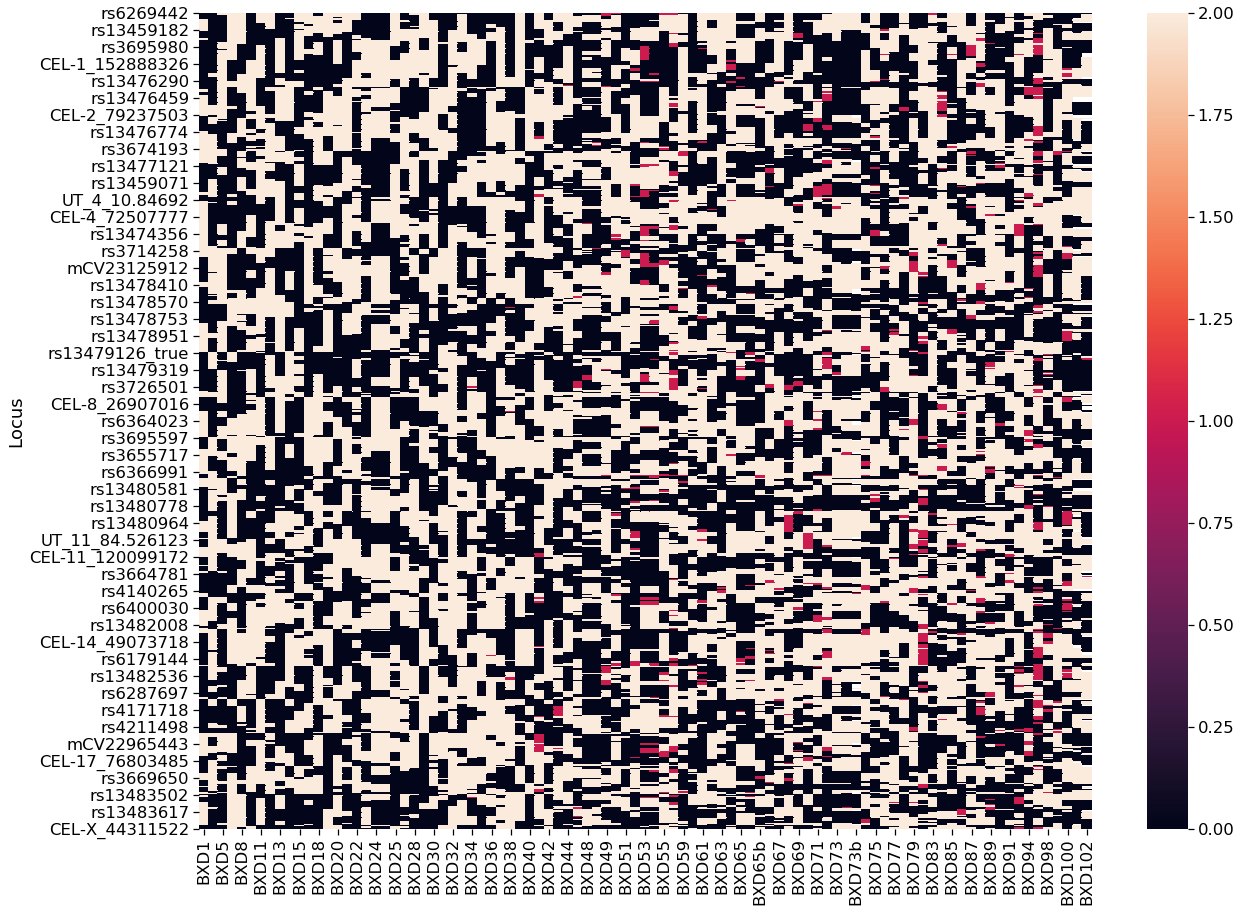

In [14]:
sns.heatmap(geno)

### Step 3: Cluster the strains based on their genotype similarity

A clustered heatmap is a heatmap with rearranged rows and/or columns, usually with an accompanying dendrogram next to the heatmap, reflecting the similarity of the rows/columns, and the steps of the hierarchical clustering. `seaborn` can do all the heavy lifting for you.

You may run into trouble with missing data: you can choose to discard them selectively, or fill them with a dummy value (the heterozygous genotype's `1` being the least bad choice).

Do you find anything visually interesting in the results? How do you interpret it?

c:\python37\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


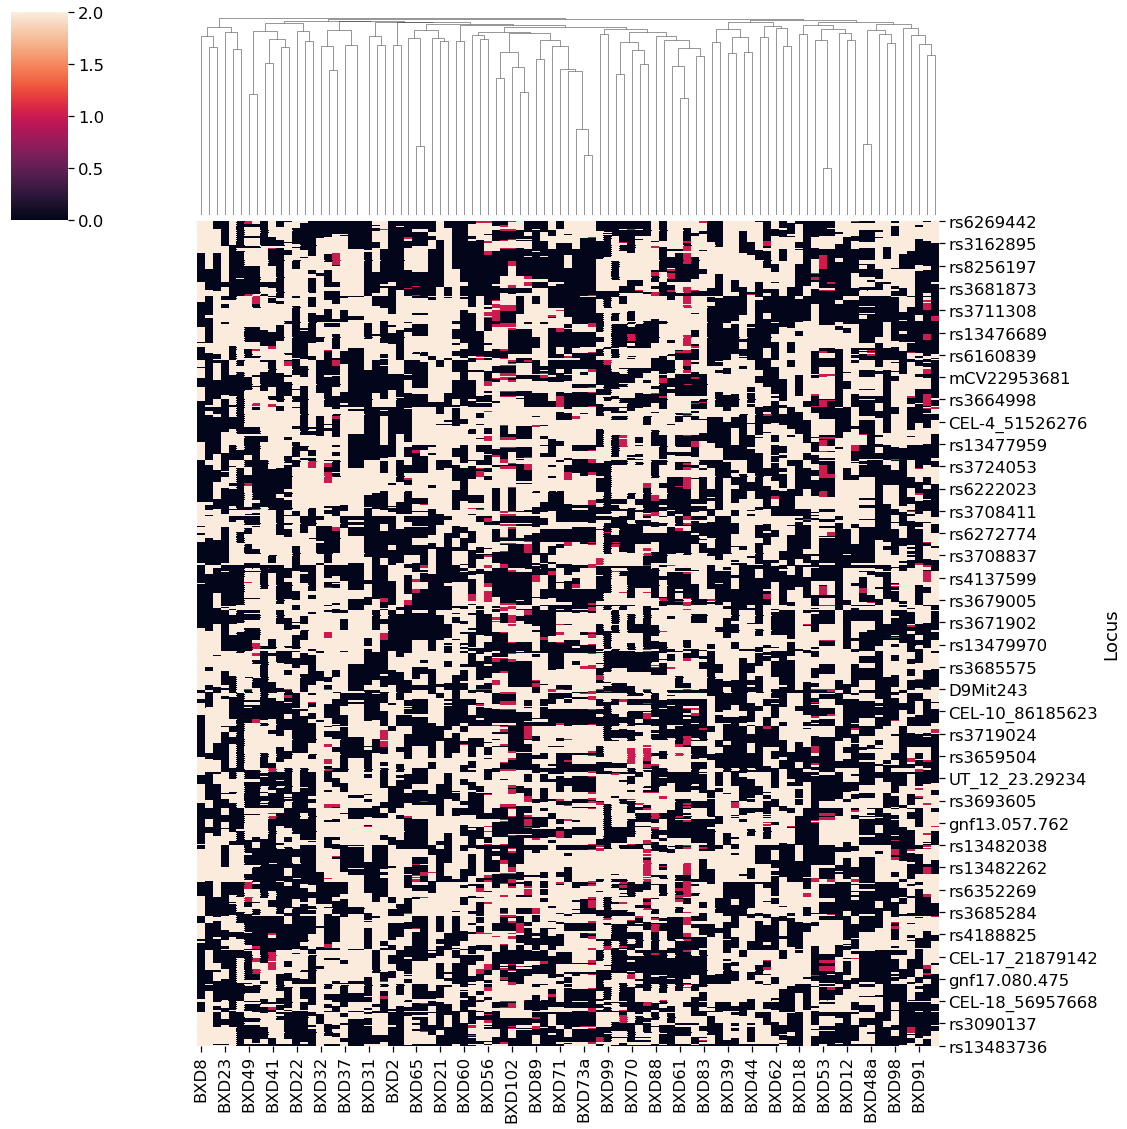

In [15]:
species = geno.index
sns.clustermap(geno.fillna(1), figsize=(16,16), row_cluster=False)

## Export the `geno_meta` and `geno` DataFrames in `tsv` files for later use

In [16]:
geno_meta.to_csv("..\output\geno_meta.tsv", index=False, sep="\t")
geno.to_csv("..\output\geno.tsv", index=False, sep="\t")